In [397]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm import tqdm

# Selenium is taking a long time so i prefered to run on the list of countries that i have in the other site, and some of
# the countries were called in different names so i changed them

In [3]:
def rename_country(country):
    
    if (country == 'Democratic Republic of the Congo'):
        return "DR Congo"
    if (country == 'Republic of the Congo'):
        return "Congo" 
    if (country == 'Federated States of Micronesia'):
        return "Micronesia"
    if (country == 'The Gambia'):
        return "Gambia"    
    if (country == 'Saint Kitts and Nevis'):
        return "Saint Kitts & Nevis"     
    if (country == 'Sao Tome and Principe'):
        return "Sao Tome & Principe"    
    if (country == 'Saint Vincent and the Grenadines'):
        return "St. Vincent & Grenadines"  
    if (country == 'Burma - Myanmar'):
        return "Myanmar"
    if (country == 'Sao Tome and Principe'):
        return "Sao Tome & Principe" 
    if (country == 'Saint Vincent and the Grenadine'):
        return "St. Vincent & Grenadines"
    if (country == 'Burma - Myanmar'):
        return "Myanmar" 
    if (country == 'Sao Tome and Principe'):
        return "Sao Tome & Principe" 
    if (country == 'Saint Vincent and the Grenadine'):
        return "St. Vincent & Grenadines" 
    return country

# getting the list of countries from another site because it has less countries on it
# plus changing the names of the misfitting countries

In [925]:
countries=[]
url = f"https://countryeconomy.com/gdp?year=2020"
html=requests.get(url)
soup=BeautifulSoup(html.content,"html.parser")
tbl=soup("table",attrs={"class":"table tabledat table-striped table-condensed table-hover"})[0]
Not_in_list=["Euro zone","Ivory Coast","Cape Verde","State of Palestine","Swaziland"]

for rows in tbl("tr"):
            cel=rows("td")
            if(len(cel)<7): 
                continue
            country=cel[0].get_text().strip(' [+]')
            if country in Not_in_list:
                pass
            else:
                country = rename_country(country)   
                countries.append(country)

print("done")

done


In [934]:
countries

['United States',
 'United Kingdom',
 'Germany',
 'France',
 'Japan',
 'Spain',
 'Italy',
 'Portugal',
 'Greece',
 'Ireland',
 'Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Albania',
 'Armenia',
 'Angola',
 'Argentina',
 'Austria',
 'Australia',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Brunei',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'DR Congo',
 'Central African Republic',
 'Congo',
 'Switzerland',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Eritrea',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Micronesia',
 'Gabon',
 'Grenada',
 'Georgia',
 'Ghana',
 'Gambia',
 'Guinea',
 'Equatorial Guinea',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Hon

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd


In [22]:
PATH='D:\chromdriver\chromedriver.exe'
driver=webdriver.Chrome(PATH)
driver.get("https://www.worldometers.info/world-population/population-by-country/")
main=driver.find_element(By.ID,"example2").find_element(By.XPATH,".//tbody").find_elements(By.XPATH,".//tr") 
df_population = None
exceptions = []
for country in tqdm(countries):
    
    time.sleep(8)
    element = driver.find_element_by_partial_link_text(country)
    element.location_once_scrolled_into_view
    name=driver.find_element_by_partial_link_text(country)
    time.sleep(3)
    name.click()
    time.sleep(8)
    table=driver.find_element(By.CLASS_NAME,"table-responsive").find_element(By.XPATH,".//tbody").find_elements(By.XPATH,".//tr")
    
    year = []
    pops = []
    pops_change = []
    mig = []
    babies = []
    urban_pops = []
    pop_percent = []
    
    if len(table[0].find_elements(By.XPATH,".//td")) == 13:
        for row in table:
            year.append(row.find_elements(By.XPATH,".//td")[0].text)
            pops.append(row.find_elements(By.XPATH,".//td")[1].text)                       
            pops_change.append(row.find_elements(By.XPATH,".//td")[2].text)                       
            mig.append(row.find_elements(By.XPATH,".//td")[4].text)
            babies.append(row.find_elements(By.XPATH,".//td")[6].text)
            urban_pops.append(row.find_elements(By.XPATH,".//td")[8].text)
            pop_percent.append(row.find_elements(By.XPATH,".//td")[10].text)
                                    
                                    
            
    elif len(table[0].find_elements(By.XPATH,".//td")) == 10:
        roww=driver.find_elements(By.XPATH,"//thead//tr[2]")
        for item in [roww,table]:
            for row in item:
                year.append(row.find_elements(By.XPATH,".//td")[0].text)
                pops.append(row.find_elements(By.XPATH,".//td")[1].text)
                pops_change.append(row.find_elements(By.XPATH,".//td")[2].text)
                mig.append(None)
                babies.append(None)
                urban_pops.append(row.find_elements(By.XPATH,".//td")[6].text)
                pop_percent.append(row.find_elements(By.XPATH,".//td")[8].text)
     
    else:
        exceptions.append(country)
        driver.back()
        continue  
       
    df_temp = pd.DataFrame({'Year': year,
                            'Country': country,
                            'Population': pops, 
                            'Yearly_pops_Change': pops_change,
                            'Migrants': mig,
                            'Fertility Rate': babies,
                            'Urban_Pop': urban_pops,
                            'World_Pop_Percent': pop_percent } )
    if df_population is None:
        df_population = df_temp.copy()
    else:    
        df_population.append(df_temp, ignore_index=True)
        df_population = pd.concat([df_population, df_temp])

    driver.back()

C:\Users\anav\AppData\Local\Temp/ipykernel_2540/3271732167.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)
  0%|          | 0/193 [00:00<?, ?it/s]C:\Users\anav\AppData\Local\Temp/ipykernel_2540/3271732167.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_partial_link_text(country)
C:\Users\anav\AppData\Local\Temp/ipykernel_2540/3271732167.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  name=driver.find_element_by_partial_link_text(country)
100%|██████████| 193/193 [1:21:15<00:00, 25.26s/it]


In [23]:
df_population

,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %
...,...,...,...,...,...,...,...,...
13,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %
14,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %
15,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %
16,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %


# saving the data on my laptop

In [30]:
df_population.to_csv(f"D:\Data science proj\df_pops.csv",index=None, header = True)

In [18]:
Not_in_list = ["Euro zone", "Ivory Coast", "Cape Verde", "State of Palestine", "Swaziland"]

page = 2020
df_GDP = None
while page != 1950:
    
    url = f"https://countryeconomy.com/gdp?year={page}"
    html = requests.get(url)
    soup=BeautifulSoup(html.content,"html.parser")
    tbl=soup("table",attrs={"class":"table tabledat table-striped table-condensed table-hover"})[0]
    
    for rows in tbl("tr"):
        cel = rows("td")
        if(len(cel)<7):
            continue
        country = cel[0].get_text().strip(' [+]')
        
        if country in Not_in_list:
            pass
        
        else:
            country = rename_country(country)
            df_temp = pd.DataFrame({'Year': [page],
                                    'Country': [country],
                                    'Annual_GDP': [cel[4].get_text()], 
                                    'GDP_Growth': [cel[6].get_text()]} )
            
            if df_GDP is None:
                df_GDP = df_temp.copy()
            else:    
                df_GDP.append(df_temp, ignore_index=True)
                df_GDP = pd.concat([df_GDP, df_temp])

            
    if (page > 2015):
        page = page - 1
    else:
        page = page - 5
print("done")

0it [01:18, ?it/s]


done


# Saving the GDP DataFrame

In [89]:

df_GDP.to_csv(f"D:\Data science proj\df_GDP.csv",index=None, header = True)
 

# opening both dataframe

In [88]:
df_GDP = pd.read_csv(f"D:\Data science proj\df_GDP.csv") 
df_population = pd.read_csv(f"D:\Data science proj\df_pops.csv")

In [33]:
df_GDP

,Year,Country,Annual_GDP,GDP_Growth
0,2020,United States,"$20,893,700M",-3.4%
1,2020,United Kingdom,"$2,709,680M",-9.7%
2,2020,Germany,"$3,843,340M",-4.6%
3,2020,France,"$2,624,420M",-7.9%
4,2020,Japan,"$5,045,100M",-4.6%
...,...,...,...,...
2990,1955,France,NaN,5.3%
2991,1955,India,NaN,3.2%
2992,1955,South Korea,NaN,5.8%
2993,1955,Peru,NaN,5.9%


# trying to merge both dataframes

In [54]:
df = pd.merge(df_population , df_GDP, on=['Year', 'Country'], how='left')
        
               

In [55]:
df

,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent,Annual_GDP,GDP_Growth
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %,"$20,893,700M",-3.4%
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %,"$21,372,600M",2.3%
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %,"$20,527,200M",2.9%
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %,"$19,479,600M",2.3%
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %,"$18,695,100M",1.7%
...,...,...,...,...,...,...,...,...,...,...
3475,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %,"$4,371M",0.9%
3476,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %,"$1,884M",NaN
3477,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %,"$1,311M",NaN
3478,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %,"$1,053M",NaN


# saving the new merged df

In [56]:
df.to_csv(f"D:\Data science proj\pops_GDP.csv",index=None, header = True)


In [58]:
df = pd.read_csv(f"D:\Data science proj\pops_GDP.csv") 


# scraping electricity

In [62]:
url = "https://countryeconomy.com/energy-and-environment/electricity-consumption"
html = requests.get(url)
soup = BeautifulSoup(html.content,"html.parser")
tbl = soup("table",attrs = {"id":"tb1"})[0]
pages_electricity = []
countries = []
for a in tbl.find_all('a', href=True):
    pages_electricity.append("https://countryeconomy.com/" + a['href'])
    countries.append(a.get_text().strip(' [+]'))

In [71]:
df_Electric = None
for page, country in tqdm(zip(pages_electricity, countries)):
    url = page
    html = requests.get(url)
    soup = BeautifulSoup(html.content,"html.parser")
    try:
        tbl = soup("table", attrs = {"id":"tb0"})[0]
    except:
        print(country)
        continue
    else:
        for rows in tbl("tr"):
            
            cel = rows("td")
            if (len(cel) < 4):
                continue 
                
            country = rename_country(country)
  
            df_temp = pd.DataFrame({'Year': [cel[0].get_text()],
                                    'Country': [country],
                                    'generation_GWh': [cel[1].get_text()], 
                                    'consumption_GWh': [cel[2].get_text()]})
            
            if df_Electric is None:
                df_Electric = df_temp.copy()
            else:    
                df_Electric.append(df_temp, ignore_index=True)
                df_Electric = pd.concat([df_Electric, df_temp])



166it [02:02,  1.47it/s]

Timor-Leste


186it [02:16,  1.36it/s]


In [72]:
df_Electric

,Year,Country,generation_GWh,consumption_GWh
0,2020,United States,"4,050,825","3,843,833"
0,2019,United States,"4,162,813","3,989,566"
0,2018,United States,"4,207,817","4,032,838"
0,2017,United States,"4,058,261","3,888,461"
0,2016,United States,"4,095,487","3,921,118"
...,...,...,...,...
0,1984,Zimbabwe,"4,502","7,106"
0,1983,Zimbabwe,"4,387","6,950"
0,1982,Zimbabwe,"4,097","7,174"
0,1981,Zimbabwe,"4,476","7,036"


In [923]:
df2 = pd.merge(df , df_Electric, on=['Year', 'Country'], how='left')

NameError: name 'df_Electric' is not defined

 # It says the types are different so i will check which column is causing the trouble with .info and change it accordingly 

In [75]:
df_Electric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7070 entries, 0 to 0
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             7070 non-null   object
 1   Country          7070 non-null   object
 2   generation_GWh   7070 non-null   object
 3   consumption_GWh  7070 non-null   object
dtypes: object(4)
memory usage: 276.2+ KB


# It seems like the column "Year" is causing the problem so  i will change it into int64

In [81]:
df_Electric["Year"] = pd.to_numeric(df_Electric["Year"])

In [82]:
df_Electric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7070 entries, 0 to 0
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             7070 non-null   int64 
 1   Country          7070 non-null   object
 2   generation_GWh   7070 non-null   object
 3   consumption_GWh  7070 non-null   object
dtypes: int64(1), object(3)
memory usage: 276.2+ KB


In [83]:
df2 = pd.merge(df , df_Electric, on=['Year', 'Country'], how='left')

In [84]:
df2

,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent,Annual_GDP,GDP_Growth,generation_GWh,consumption_GWh
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %,"$20,893,700M",-3.4%,"4,050,825","3,843,833"
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %,"$21,372,600M",2.3%,"4,162,813","3,989,566"
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %,"$20,527,200M",2.9%,"4,207,817","4,032,838"
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %,"$19,479,600M",2.3%,"4,058,261","3,888,461"
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %,"$18,695,100M",1.7%,"4,095,487","3,921,118"
...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %,"$4,371M",0.9%,NaN,NaN
3476,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %,"$1,884M",NaN,NaN,NaN
3477,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %,"$1,311M",NaN,NaN,NaN
3478,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %,"$1,053M",NaN,NaN,NaN


# saving the new df

In [90]:
df2.to_csv(f"D:\Data science proj\pops_GDP_elect.csv",index=None, header = True)

In [91]:
df3 = pd.read_csv(f"D:\Data science proj\pops_GDP_elect.csv") 


# scraping imports

In [127]:
url = "https://countryeconomy.com/trade/imports"
html = requests.get(url)
soup = BeautifulSoup(html.content,"html.parser")
tbl = soup("table",attrs = {"id":"tb1"})[0]
pages_imports = []
countries = []
for a in tbl.find_all('a', href=True):
    pages_imports.append("https://countryeconomy.com/" + a['href'])
    countries.append(a.get_text().strip(' [+]'))

In [99]:
df_imports = None
for page, country in tqdm(zip(pages_imports, countries)):
    url = page
    html = requests.get(url)
    soup = BeautifulSoup(html.content,"html.parser")
    try:
        tbl = soup("table", attrs = {"id":"tb0"})[0]
    except:
        print(country)
        continue
    else:
        for rows in tbl("tr"):
            
            cel = rows("td")
            if (len(cel) < 4):
                continue 
                
            country = rename_country(country)
  
            df_temp = pd.DataFrame({'Year': [cel[0].get_text()],
                                    'Country': [country],
                                    'Imports': [cel[1].get_text()], 
                                    'Imports_GDP': [cel[2].get_text()]})
            
            if df_imports is None:
                df_imports = df_temp.copy()
            else:    
                df_imports.append(df_temp, ignore_index=True)
                df_imports = pd.concat([df_imports, df_temp])


192it [03:05,  1.04it/s]


In [102]:
df_imports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12117 entries, 0 to 0
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         12117 non-null  object
 1   Country      12117 non-null  object
 2   Imports      12117 non-null  object
 3   Imports_GDP  12117 non-null  object
dtypes: object(4)
memory usage: 473.3+ KB


In [103]:
df_imports["Year"] = pd.to_numeric(df_imports["Year"])

In [104]:
df_imports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12117 entries, 0 to 0
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         12117 non-null  int64 
 1   Country      12117 non-null  object
 2   Imports      12117 non-null  object
 3   Imports_GDP  12117 non-null  object
dtypes: int64(1), object(3)
memory usage: 473.3+ KB


In [111]:
df4 = pd.merge(df3 , df_imports, on=['Year', 'Country'], how='left')

In [112]:
df4

,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent,Annual_GDP,GDP_Growth,generation_GWh,consumption_GWh,Imports,Imports_GDP
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %,"$20,893,700M",-3.4%,"4,050,825","3,843,833","€2,107,813.9M","$2,407,545.1M"
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %,"$21,372,600M",2.3%,"4,162,813","3,989,566","€2,293,385.1M","$2,567,444.6M"
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %,"$20,527,200M",2.9%,"4,207,817","4,032,838","€2,213,566.0M","$2,614,221.4M"
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %,"$19,479,600M",2.3%,"4,058,261","3,888,461","€2,131,960.4M","$2,408,475.7M"
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %,"$18,695,100M",1.7%,"4,095,487","3,921,118","€2,032,843.0M","$2,250,153.9M"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %,"$4,371M",0.9%,NaN,NaN,,$931.7M
3476,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %,"$1,884M",NaN,NaN,NaN,,$378.4M
3477,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %,"$1,311M",NaN,NaN,NaN,,$385.8M
3478,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %,"$1,053M",NaN,NaN,NaN,,$252.0M


# Scraping exports

In [742]:
url = "https://countryeconomy.com/trade/exports"
html = requests.get(url)
soup = BeautifulSoup(html.content,"html.parser")
tbl = soup("table",attrs = {"id":"tb1"})[0]
pages_exports = []
countries = []
for a in tbl.find_all('a', href=True):
    pages_exports.append("https://countryeconomy.com/" + a['href'])
    countries.append(a.get_text().strip(' [+]'))

In [743]:
df_exports = None
for page, country in tqdm(zip(pages_exports, countries)):
    url = page
    html = requests.get(url)
    soup = BeautifulSoup(html.content,"html.parser")
    try:
        tbl = soup("table", attrs = {"id":"tb0"})[0]
    except:
        print(country)
        continue
    else:
        for rows in tbl("tr"):
            
            cel = rows("td")
            if (len(cel) < 4):
                continue 
                
            country = rename_country(country)
  
            df_temp = pd.DataFrame({'Year': [cel[0].get_text()],
                                    'Country': [country],
                                    'Exports': [cel[1].get_text()], 
                                    'Exports_GDP': [cel[2].get_text()]})
            
            if df_exports is None:
                df_exports = df_temp.copy()
            else:    
                df_exports.append(df_temp, ignore_index=True)
                df_exports = pd.concat([df_exports, df_temp])

191it [03:12,  1.01s/it]


In [744]:
df_exports.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12121 entries, 0 to 0
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         12121 non-null  object
 1   Country      12121 non-null  object
 2   Exports      12121 non-null  object
 3   Exports_GDP  12121 non-null  object
dtypes: object(4)
memory usage: 473.5+ KB


In [119]:
df_exports["Year"] = pd.to_numeric(df_exports["Year"])

In [120]:
df5 = pd.merge(df4 , df_exports, on=['Year', 'Country'], how='left')

In [121]:
df5

,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent,Annual_GDP,GDP_Growth,generation_GWh,consumption_GWh,Imports,Imports_GDP,Exports,Exports_GDP
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %,"$20,893,700M",-3.4%,"4,050,825","3,843,833","€2,107,813.9M","$2,407,545.1M","€1,253,404.3M","$1,431,638.4M"
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %,"$21,372,600M",2.3%,"4,162,813","3,989,566","€2,293,385.1M","$2,567,444.6M","€1,467,763.2M","$1,643,160.9M"
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %,"$20,527,200M",2.9%,"4,207,817","4,032,838","€2,213,566.0M","$2,614,221.4M","€1,408,960.4M","$1,663,982.3M"
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %,"$19,479,600M",2.3%,"4,058,261","3,888,461","€2,131,960.4M","$2,408,475.7M","€1,368,746.5M","$1,546,273.0M"
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %,"$18,695,100M",1.7%,"4,095,487","3,921,118","€2,032,843.0M","$2,250,153.9M","€1,310,877.9M","$1,451,010.7M"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %,"$4,371M",0.9%,NaN,NaN,,$931.7M,,$931.9M
3476,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %,"$1,884M",NaN,NaN,NaN,,$378.4M,,$370.4M
3477,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %,"$1,311M",NaN,NaN,NaN,,$385.8M,,$451.9M
3478,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %,"$1,053M",NaN,NaN,NaN,,$252.0M,,$173.0M


# scraping the co2 emissions

In [745]:
url = "https://countryeconomy.com/energy-and-environment/co2-emissions"
html = requests.get(url)
soup = BeautifulSoup(html.content,"html.parser")
tbl = soup("table",attrs = {"id":"tb1"})[0]
pages_co2 = []
countries = []
for a in tbl.find_all('a', href=True):
    pages_co2.append("https://countryeconomy.com/" + a['href'])
    countries.append(a.get_text().strip(' [+]'))

In [746]:
df_co2 = None
for page, country in tqdm(zip(pages_co2, countries)):
    url = page
    html = requests.get(url)
    soup = BeautifulSoup(html.content,"html.parser")
    try:
        tbl = soup("table", attrs = {"id":"tb0"})[0]
    except:
        print(country)
        continue
    else:
        for rows in tbl("tr"):
            
            cel = rows("td")
            if (len(cel) < 4):
                continue 
                
            country = rename_country(country)
  
            df_temp = pd.DataFrame({'Year': [cel[0].get_text()],
                                    'Country': [country],
                                    'CO2 emission': [cel[1].get_text()]})
            
            if df_co2 is None:
                df_co2 = df_temp.copy()
            else:    
                df_co2.append(df_temp, ignore_index=True)
                df_co2 = pd.concat([df_co2, df_temp])


184it [02:29,  1.23it/s]


In [751]:
df_co2[df_co2.Country == "China"]

,Year,Country,CO2 emission
0,2020,China,"11,680.416"
0,2019,China,"11,503.857"
0,2018,China,"11,260.010"
0,2017,China,"10,921.794"
0,2016,China,"10,731.519"
0,2015,China,"10,722.407"
0,2014,China,"10,761.250"
0,2013,China,"10,738.429"
0,2012,China,"10,480.811"
0,2011,China,"10,157.381"


In [155]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9384 entries, 0 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          9384 non-null   object
 1   Country       9384 non-null   object
 2   CO2 emission  9384 non-null   object
dtypes: object(3)
memory usage: 293.2+ KB


In [750]:
df_co2["Year"] = pd.to_numeric(df_co2["Year"])

# merging the final data into my df and saving it on my pc

In [753]:
df6 = pd.merge(df, df_co2, on=['Year', 'Country'], how='left')

In [758]:
df6 = df6.drop("CO2 emission_x", axis=1)

In [759]:
df6[df6.Country == "China"]


,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent,Annual_GDP,GDP_Growth,generation_GWh,consumption_GWh,Imports,Imports_GDP,Exports,Exports_GDP,CO2 emission_y
810,2020,China,"1,439,323,776",0.39 %,"-348,399",1.69,60.8 %,18.47 %,"$14,866,740M",2.3%,NaN,NaN,"€1,799,818.1M","$2,055,752.2M","€2,268,535.5M","$2,591,121.2M","11,680.416"
811,2019,China,"1,433,783,686",0.43 %,"-348,399",1.65,59.7 %,18.59 %,"$14,340,600M",6.1%,"7,224,896","6,875,089","€1,856,530.9M","$2,078,386.4M","€2,232,654.8M","$2,499,457.0M","11,503.857"
812,2018,China,"1,427,647,786",0.47 %,"-348,399",1.65,58.6 %,18.71 %,"$13,841,810M",6.7%,"6,801,933","6,452,119","€1,808,423.4M","$2,135,748.0M","€2,105,584.3M","$2,486,695.0M","11,260.010"
813,2017,China,"1,421,021,791",0.49 %,"-348,399",1.65,57.5 %,18.83 %,"$12,265,330M",6.9%,"6,286,207","5,953,577","€1,632,107.6M","$1,843,792.0M","€2,003,493.0M","$2,263,346.0M","10,921.794"
814,2016,China,"1,414,049,351",0.51 %,"-348,399",1.65,56.3 %,18.94 %,"$11,226,900M",6.8%,"5,884,177","5,565,162","€1,434,569.5M","$1,587,925.0M","€1,895,051.0M","$2,097,632.0M","10,731.519"
815,2015,China,"1,406,847,870",0.55 %,"-310,442",1.64,55.1 %,19.06 %,"$11,113,510M",7.0%,"5,561,814","5,250,584","€1,513,804.4M","$1,679,566.0M","€2,049,092.4M","$2,273,468.0M","10,722.407"
816,2010,China,"1,368,810,615",0.57 %,"-435,677",1.62,48.9 %,19.68 %,"$6,033,830M",10.6%,"3,984,020","3,713,682","€1,053,214.9M","$1,396,247.0M","€1,190,129.0M","$1,577,754.0M","9,296.485"
817,2005,China,"1,330,776,380",0.62 %,"-393,116",1.61,42.2 %,20.34 %,"$2,290,020M",11.4%,"2,373,002","2,196,172","€530,466.2M","$659,953.0M","€612,453.2M","$761,953.0M","6,338.561"
818,2000,China,"1,290,550,765",0.79 %,"-76,600",1.62,35.7 %,21.01 %,"$1,205,530M",8.5%,"1,280,613","1,178,033","€243,713.7M","$225,094.0M","€269,817.0M","$249,203.0M","3,705.673"
819,1995,China,"1,240,920,535",1.07 %,"-155,996",1.83,30.9 %,21.60 %,"$730,996M",11.0%,"956,307","876,577",NaN,"$132,084.0M",NaN,"$148,780.0M","3,415.471"


In [158]:
df6.to_csv(f"D:\Data science proj\DF.csv", index=None, header=True)

In [760]:
df6.to_csv(f"F:/new fold/DF.csv", index=None, header=True)

In [830]:
df = pd.read_csv(f"F:/new fold/DF.csv") 


In [832]:
df

,Year,Country,Population,Yearly_pops_Change,Migrants,Fertility Rate,Urban_Pop,World_Pop_Percent,Annual_GDP,GDP_Growth,generation_GWh,consumption_GWh,Imports,Imports_GDP,Exports,Exports_GDP,CO2 emission_y
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %,"$20,893,700M",-3.4%,"4,050,825","3,843,833","€2,107,813.9M","$2,407,545.1M","€1,253,404.3M","$1,431,638.4M","4,535.301"
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %,"$21,372,600M",2.3%,"4,162,813","3,989,566","€2,293,385.1M","$2,567,444.6M","€1,467,763.2M","$1,643,160.9M","5,036.047"
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %,"$20,527,200M",2.9%,"4,207,817","4,032,838","€2,213,566.0M","$2,614,221.4M","€1,408,960.4M","$1,663,982.3M","5,159.307"
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %,"$19,479,600M",2.3%,"4,058,261","3,888,461","€2,131,960.4M","$2,408,475.7M","€1,368,746.5M","$1,546,273.0M","5,005.532"
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %,"$18,695,100M",1.7%,"4,095,487","3,921,118","€2,032,843.0M","$2,250,153.9M","€1,310,877.9M","$1,451,010.7M","5,076.983"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %,"$4,371M",0.9%,NaN,NaN,NaN,$931.7M,NaN,$931.9M,8.944
3476,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %,"$1,884M",NaN,NaN,NaN,NaN,$378.4M,NaN,$370.4M,9.319
3477,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %,"$1,311M",NaN,NaN,NaN,NaN,$385.8M,NaN,$451.9M,NaN
3478,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %,"$1,053M",NaN,NaN,NaN,NaN,$252.0M,NaN,$173.0M,NaN


# EDA quality 

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3480 non-null   int64  
 1   Country             3480 non-null   object 
 2   Population          3480 non-null   object 
 3   Yearly_pops_Change  3480 non-null   object 
 4   Migrants            3294 non-null   object 
 5   Fertility Rate      3294 non-null   float64
 6   Urban_Pop           3480 non-null   object 
 7   World_Pop_Percent   3480 non-null   object 
 8   Annual_GDP          2999 non-null   object 
 9   GDP_Growth          2660 non-null   object 
 10  generation_GWh      2121 non-null   object 
 11  consumption_GWh     2124 non-null   object 
 12  Imports             1706 non-null   object 
 13  Imports_GDP         3057 non-null   object 
 14  Exports             1705 non-null   object 
 15  Exports_GDP         3056 non-null   object 
 16  CO2 em

# i see that most of the columns are objects which might cause an issue in the future when i try to build graphs 
# so i will change them to float and its also a numeric data so i rather use numeric type

# first of all we need to change the titles in the dataframe to match the symbols we will be removing 

# lets check if there is only € mark in imports or maybe there are few with dollars, to do so i will try to remove it from the string and change it to float


In [834]:
df['Imports'].replace('[,€M]', '', regex=True).astype(float)

0       2107813.9
1       2293385.1
2       2213566.0
3       2131960.4
4       2032843.0
          ...    
3475          NaN
3476          NaN
3477          NaN
3478          NaN
3479          NaN
Name: Imports, Length: 3480, dtype: float64

# there was no issue so it seems there are only € so now i can change the column name to imports€

In [835]:
df.rename(columns = {'Imports':'imports_€'}, inplace = True)


# Now i will do the same on exports

In [836]:
df['Exports'].replace('[,€M]', '', regex=True).astype(float)

0       1253404.3
1       1467763.2
2       1408960.4
3       1368746.5
4       1310877.9
          ...    
3475          NaN
3476          NaN
3477          NaN
3478          NaN
3479          NaN
Name: Exports, Length: 3480, dtype: float64

In [837]:
df.rename(columns = {'Exports':'Exports_€'}, inplace = True)


# Now i will change all the columns with percentages in them

In [838]:
cList = ['Yearly_pops_Change', 'Urban_Pop', 'World_Pop_Percent', 'GDP_Growth']
for column in cList:
    df.rename(columns = {column : column + '_%'}, inplace = True)


In [839]:
df

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP,GDP_Growth_%,generation_GWh,consumption_GWh,imports_€,Imports_GDP,Exports_€,Exports_GDP,CO2 emission_y
0,2020,United States,"331,002,651",0.59 %,"954,806",1.78,82.8 %,4.25 %,"$20,893,700M",-3.4%,"4,050,825","3,843,833","€2,107,813.9M","$2,407,545.1M","€1,253,404.3M","$1,431,638.4M","4,535.301"
1,2019,United States,"329,064,917",0.60 %,"954,806",1.85,82.5 %,4.27 %,"$21,372,600M",2.3%,"4,162,813","3,989,566","€2,293,385.1M","$2,567,444.6M","€1,467,763.2M","$1,643,160.9M","5,036.047"
2,2018,United States,"327,096,265",0.62 %,"954,806",1.85,82.2 %,4.29 %,"$20,527,200M",2.9%,"4,207,817","4,032,838","€2,213,566.0M","$2,614,221.4M","€1,408,960.4M","$1,663,982.3M","5,159.307"
3,2017,United States,"325,084,756",0.64 %,"954,806",1.85,81.9 %,4.31 %,"$19,479,600M",2.3%,"4,058,261","3,888,461","€2,131,960.4M","$2,408,475.7M","€1,368,746.5M","$1,546,273.0M","5,005.532"
4,2016,United States,"323,015,995",0.67 %,"954,806",1.85,81.7 %,4.33 %,"$18,695,100M",1.7%,"4,095,487","3,921,118","€2,032,843.0M","$2,250,153.9M","€1,310,877.9M","$1,451,010.7M","5,076.983"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1975,Zimbabwe,"6,293,875",3.54 %,"-9,109",7.40,19.3 %,0.15 %,"$4,371M",0.9%,NaN,NaN,NaN,$931.7M,NaN,$931.9M,8.944
3476,1970,Zimbabwe,"5,289,303",3.42 %,"-8,400",7.40,17.0 %,0.14 %,"$1,884M",NaN,NaN,NaN,NaN,$378.4M,NaN,$370.4M,9.319
3477,1965,Zimbabwe,"4,471,177",3.43 %,"-3,002",7.30,14.4 %,0.13 %,"$1,311M",NaN,NaN,NaN,NaN,$385.8M,NaN,$451.9M,NaN
3478,1960,Zimbabwe,"3,776,681",3.28 %,"-1,501",7.00,12.5 %,0.12 %,"$1,053M",NaN,NaN,NaN,NaN,$252.0M,NaN,$173.0M,NaN


# this time i will test if there are only dollar sign and nothing else

In [840]:
cList = ['Annual_GDP', 'Imports_GDP', 'Exports_GDP']
for column in cList:  
    print(df[column].replace('[,#$M]', '', regex=True).astype(float))

0       20893700.0
1       21372600.0
2       20527200.0
3       19479600.0
4       18695100.0
           ...    
3475        4371.0
3476        1884.0
3477        1311.0
3478        1053.0
3479           NaN
Name: Annual_GDP, Length: 3480, dtype: float64
0       2407545.1
1       2567444.6
2       2614221.4
3       2408475.7
4       2250153.9
          ...    
3475        931.7
3476        378.4
3477        385.8
3478        252.0
3479        229.0
Name: Imports_GDP, Length: 3480, dtype: float64
0       1431638.4
1       1643160.9
2       1663982.3
3       1546273.0
4       1451010.7
          ...    
3475        931.9
3476        370.4
3477        451.9
3478        173.0
3479        126.0
Name: Exports_GDP, Length: 3480, dtype: float64


# everything changed to float so there was no other signs 

In [841]:
cList = ['Annual_GDP', 'Imports_GDP', 'Exports_GDP']
for column in cList:
    df.rename(columns = {column : column + '_$'}, inplace = True)


In [842]:
df.rename(columns = {'CO2 emission_y':'CO2 emission_Mt'}, inplace = True)

# There was an issue with the column Urban_pop, it had N.A instead of Nones so i had to change the N A to NANS
# and i changed the M's to six zeros because i don't know if every single country had M in its row

In [843]:
import numpy as np

In [844]:
df['Urban_Pop_%'] = df['Urban_Pop_%'].replace('N.A.', np.NaN )
df[df.columns.tolist()[2:]] = df[df.columns.tolist()[2:]].replace('[,%&€$]', '', regex=True).replace('M', '000000', regex=True).astype(float)
df.head()

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,imports_€,Imports_GDP_$,Exports_€,Exports_GDP_$,CO2 emission_Mt
0,2020,United States,331002651.0,0.59,954806.0,1.78,82.8,4.25,2.089370e+13,-3.4,4050825.0,3843833.0,2107813.9,2407545.1,1253404.3,1431638.4,4535.301
1,2019,United States,329064917.0,0.60,954806.0,1.85,82.5,4.27,2.137260e+13,2.3,4162813.0,3989566.0,2293385.1,2567444.6,1467763.2,1643160.9,5036.047
2,2018,United States,327096265.0,0.62,954806.0,1.85,82.2,4.29,2.052720e+13,2.9,4207817.0,4032838.0,2213566.0,2614221.4,1408960.4,1663982.3,5159.307
3,2017,United States,325084756.0,0.64,954806.0,1.85,81.9,4.31,1.947960e+13,2.3,4058261.0,3888461.0,2131960.4,2408475.7,1368746.5,1546273.0,5005.532
4,2016,United States,323015995.0,0.67,954806.0,1.85,81.7,4.33,1.869510e+13,1.7,4095487.0,3921118.0,2032843.0,2250153.9,1310877.9,1451010.7,5076.983


In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3480 non-null   int64  
 1   Country               3480 non-null   object 
 2   Population            3480 non-null   float64
 3   Yearly_pops_Change_%  3480 non-null   float64
 4   Migrants              3294 non-null   float64
 5   Fertility Rate        3294 non-null   float64
 6   Urban_Pop_%           3427 non-null   float64
 7   World_Pop_Percent_%   3480 non-null   float64
 8   Annual_GDP_$          2999 non-null   float64
 9   GDP_Growth_%          2660 non-null   float64
 10  generation_GWh        2121 non-null   float64
 11  consumption_GWh       2124 non-null   float64
 12  imports_€             1706 non-null   float64
 13  Imports_GDP_$         3057 non-null   float64
 14  Exports_€             1705 non-null   float64
 15  Exports_GDP_$        

In [846]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3480.0,1.994209e+03,2.172994e+01,1955.00,1.975000e+03,2.000000e+03,2.016000e+03,2.020000e+03
Population,3480.0,3.016424e+07,1.168509e+08,3819.00,1.317405e+06,5.771223e+06,1.874105e+07,1.439324e+09
Yearly_pops_Change_%,3480.0,1.709693e+00,1.464301e+00,-5.18,7.300000e-01,1.615000e+00,2.610000e+00,1.851000e+01
Migrants,3294.0,-2.414997e+00,1.112766e+05,-1077397.00,-1.559425e+04,-1.105000e+03,6.921250e+03,1.771991e+06
Fertility Rate,3294.0,3.908057e+00,1.989575e+00,0.95,2.080000e+00,3.440000e+00,5.850000e+00,8.800000e+00
Urban_Pop_%,3427.0,8.461635e+02,5.170215e+03,1.90,3.110000e+01,5.140000e+01,7.300000e+01,7.500700e+04
World_Pop_Percent_%,3480.0,3.078419e+08,1.357013e+09,0.00,4.000000e-02,1.400000e-01,4.700000e-01,7.794799e+09
Annual_GDP_$,2999.0,2.429816e+11,1.247723e+12,3000000.00,2.001500e+09,1.236000e+10,7.051700e+10,2.137260e+13
GDP_Growth_%,2660.0,2.883346e+00,6.246655e+00,-51.00,8.000000e-01,3.200000e+00,5.600000e+00,1.105000e+02
generation_GWh,2121.0,1.037414e+05,4.581490e+05,3.00,1.007000e+03,8.860000e+03,4.965300e+04,7.224896e+06


# Now i will check how many duplicates do i have

In [848]:
df[df[df.columns.tolist()[:-1]].duplicated(keep=False)].shape


(42, 17)

In [849]:
df.drop_duplicates(subset=df.columns.tolist()[:-1], keep='first', inplace=True, ignore_index=False)

# After i dropped the duplicates i checked if everything alright with the code below, i checked if there are more then one line with the same year and country and i found this short list.


In [851]:
df[df[df.columns.tolist()[:2]].duplicated(keep=False)]

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,imports_€,Imports_GDP_$,Exports_€,Exports_GDP_$,CO2 emission_Mt
1800,2020,Liechtenstein,38128.0,0.35,NaN,NaN,5571.0,7.794799e+09,6.684000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,2020,Liechtenstein,38128.0,0.35,NaN,NaN,5571.0,7.794799e+09,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,2019,Liechtenstein,38019.0,0.29,NaN,NaN,5519.0,7.713468e+09,6.684000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,2019,Liechtenstein,38019.0,0.29,NaN,NaN,5519.0,7.713468e+09,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,2018,Liechtenstein,37910.0,0.29,NaN,NaN,5470.0,7.631091e+09,6.839000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805,2018,Liechtenstein,37910.0,0.29,NaN,NaN,5470.0,7.631091e+09,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Because it was short and very specific i fixed it manually 

In [852]:
df.loc[[1800, 1802, 1804],'GDP_Growth_%'] = 0.7

In [853]:
df.loc[[1800, 1802, 1804],'GDP_Growth_%']

1800    0.7
1802    0.7
1804    0.7
Name: GDP_Growth_%, dtype: float64

In [854]:
df.drop([1801, 1803, 1805], inplace=True)

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3479
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3456 non-null   int64  
 1   Country               3456 non-null   object 
 2   Population            3456 non-null   float64
 3   Yearly_pops_Change_%  3456 non-null   float64
 4   Migrants              3294 non-null   float64
 5   Fertility Rate        3294 non-null   float64
 6   Urban_Pop_%           3403 non-null   float64
 7   World_Pop_Percent_%   3456 non-null   float64
 8   Annual_GDP_$          2984 non-null   float64
 9   GDP_Growth_%          2646 non-null   float64
 10  generation_GWh        2121 non-null   float64
 11  consumption_GWh       2124 non-null   float64
 12  imports_€             1706 non-null   float64
 13  Imports_GDP_$         3057 non-null   float64
 14  Exports_€             1705 non-null   float64
 15  Exports_GDP_$        

# Now when i don't have duplicated row i can start cleaning the data and remove nans
# But first i need to remove the lines or countries that doesn't have the co2 data, because that's what i'm trying to predict so i must have the entire data about it

In [856]:
df.dropna(subset=['CO2 emission_Mt'], inplace=True)


In [858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2715 entries, 0 to 3476
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2715 non-null   int64  
 1   Country               2715 non-null   object 
 2   Population            2715 non-null   float64
 3   Yearly_pops_Change_%  2715 non-null   float64
 4   Migrants              2685 non-null   float64
 5   Fertility Rate        2685 non-null   float64
 6   Urban_Pop_%           2684 non-null   float64
 7   World_Pop_Percent_%   2715 non-null   float64
 8   Annual_GDP_$          2618 non-null   float64
 9   GDP_Growth_%          2465 non-null   float64
 10  generation_GWh        2097 non-null   float64
 11  consumption_GWh       2100 non-null   float64
 12  imports_€             1651 non-null   float64
 13  Imports_GDP_$         2554 non-null   float64
 14  Exports_€             1650 non-null   float64
 15  Exports_GDP_$        

# Now i checked few countries to have a better understanding of where the nans are

In [859]:
df[df['Country'] == 'United States']

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,imports_€,Imports_GDP_$,Exports_€,Exports_GDP_$,CO2 emission_Mt
0,2020,United States,331002651.0,0.59,954806.0,1.78,82.8,4.25,2.089370e+13,-3.4,4050825.0,3843833.0,2107813.9,2407545.1,1253404.3,1431638.4,4535.301
1,2019,United States,329064917.0,0.60,954806.0,1.85,82.5,4.27,2.137260e+13,2.3,4162813.0,3989566.0,2293385.1,2567444.6,1467763.2,1643160.9,5036.047
2,2018,United States,327096265.0,0.62,954806.0,1.85,82.2,4.29,2.052720e+13,2.9,4207817.0,4032838.0,2213566.0,2614221.4,1408960.4,1663982.3,5159.307
3,2017,United States,325084756.0,0.64,954806.0,1.85,81.9,4.31,1.947960e+13,2.3,4058261.0,3888461.0,2131960.4,2408475.7,1368746.5,1546273.0,5005.532
4,2016,United States,323015995.0,0.67,954806.0,1.85,81.7,4.33,1.869510e+13,1.7,4095487.0,3921118.0,2032843.0,2250153.9,1310877.9,1451010.7,5076.983
5,2015,United States,320878310.0,0.76,992343.0,1.88,81.4,4.35,1.820600e+13,2.7,4091740.0,3914299.0,2086796.9,2315301.2,1354278.7,1502572.2,5179.691
6,2010,United States,309011475.0,0.93,1085751.0,2.06,80.7,4.44,1.504900e+13,2.7,4127471.0,3889162.0,1485391.8,1969183.9,964392.4,1278495.0,5571.872
7,2005,United States,294993511.0,0.93,1066979.0,2.04,80.0,4.51,1.303920e+13,3.5,4055766.0,3811328.0,1392738.5,1732706.0,724284.2,901082.0,5950.701
8,2000,United States,281710909.0,1.22,1771991.0,2.00,79.1,4.59,1.025100e+13,4.1,3802216.0,3592467.0,1363469.0,1259300.0,846598.1,781918.0,6004.317
9,1995,United States,265163745.0,1.01,892751.0,2.03,77.4,4.62,7.639700e+12,2.7,3353545.0,3164021.0,NaN,770852.0,NaN,584743.0,5360.879


# With group by i had easier time to see where i have missing values

In [860]:
df.groupby('Country').count()

,Year,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,imports_€,Imports_GDP_$,Exports_€,Exports_GDP_$,CO2 emission_Mt
Country,,,,,,,,,,,,,,,,
Afghanistan,15,15,15,15,15,15,15,15,14,12,12,9,15,9,15,15
Albania,15,15,15,15,15,15,15,15,14,12,12,9,11,9,11,15
Algeria,15,15,15,15,15,15,15,15,14,12,12,9,15,9,15,15
Angola,15,15,15,15,15,15,15,15,14,12,12,9,15,9,15,15
Antigua and Barbuda,15,15,15,15,15,15,15,15,14,12,12,9,15,9,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,15,15,15,15,15,13,15,15,14,12,12,9,15,9,15,15
Vietnam,15,15,15,15,15,15,15,15,14,12,12,9,15,9,15,15
Yemen,15,15,15,15,15,15,15,11,11,12,12,9,15,9,15,15


# After some thinking i decided to drop the import and export columns because there were too many missing data (not enough for my training set)

In [861]:
df.drop(labels=['imports_€', 'Exports_€'], axis=1, index=None,inplace=True, errors='raise') 

In [862]:
df

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
0,2020,United States,331002651.0,0.59,954806.0,1.78,82.8,4.25,2.089370e+13,-3.4,4050825.0,3843833.0,2407545.1,1431638.4,4535.301
1,2019,United States,329064917.0,0.60,954806.0,1.85,82.5,4.27,2.137260e+13,2.3,4162813.0,3989566.0,2567444.6,1643160.9,5036.047
2,2018,United States,327096265.0,0.62,954806.0,1.85,82.2,4.29,2.052720e+13,2.9,4207817.0,4032838.0,2614221.4,1663982.3,5159.307
3,2017,United States,325084756.0,0.64,954806.0,1.85,81.9,4.31,1.947960e+13,2.3,4058261.0,3888461.0,2408475.7,1546273.0,5005.532
4,2016,United States,323015995.0,0.67,954806.0,1.85,81.7,4.33,1.869510e+13,1.7,4095487.0,3921118.0,2250153.9,1451010.7,5076.983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,1990,Zimbabwe,10432421.0,3.28,16871.0,5.37,28.3,0.20,1.014400e+10,7.0,9254.0,9948.0,1847.0,1726.0,17.212
3473,1985,Zimbabwe,8877489.0,3.68,19814.0,6.30,24.8,0.18,5.637000e+09,6.9,4992.0,7145.0,1031.0,1112.0,10.697
3474,1980,Zimbabwe,7408624.0,3.32,-30457.0,7.30,21.6,0.17,6.679000e+09,10.6,4465.0,6902.0,1448.0,1414.0,9.661
3475,1975,Zimbabwe,6293875.0,3.54,-9109.0,7.40,19.3,0.15,4.371000e+09,0.9,NaN,NaN,931.7,931.9,8.944


In [863]:
import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns

%matplotlib inline

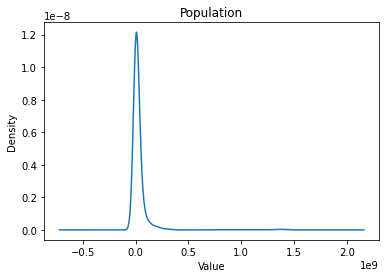

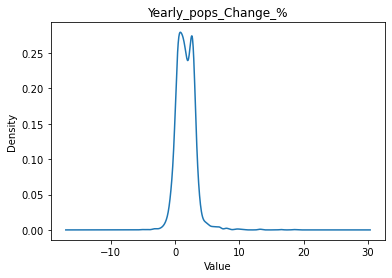

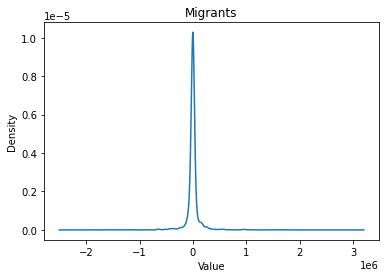

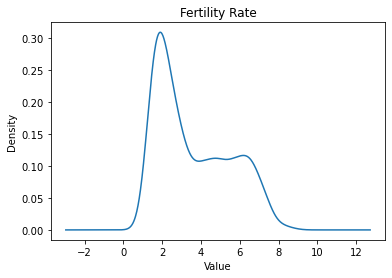

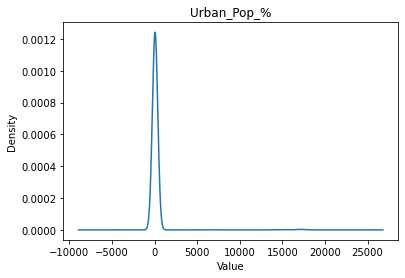

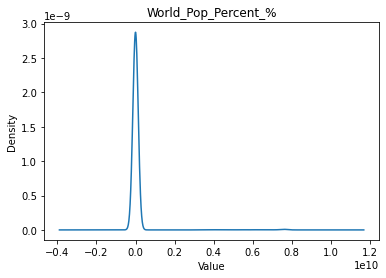

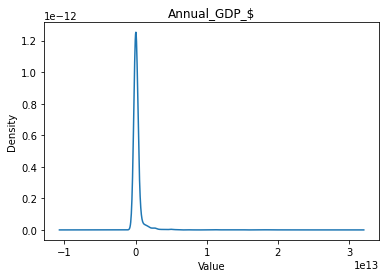

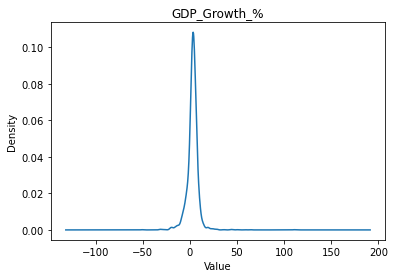

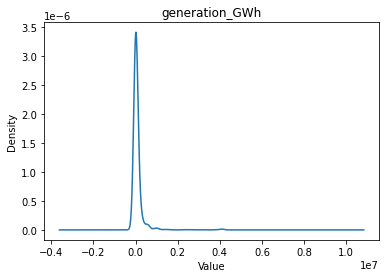

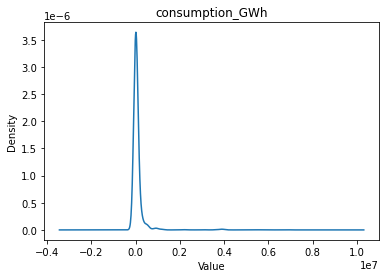

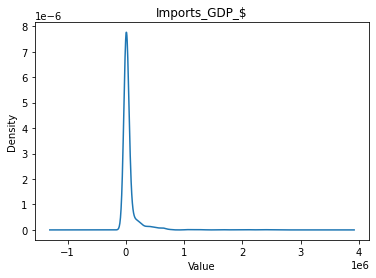

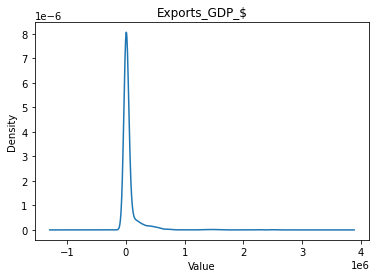

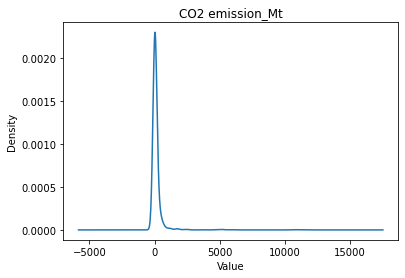

In [864]:
for column in df.columns.tolist()[2:]:   
    df[column].plot(kind='kde')
    plt.xlabel('Value')
    plt.title(column)
    plt.show()

# I don't see any serious outliers therefor i don't need to clean the data
# but i could see there is interesting information about the fertility rate graph which means there are two major groups
# the first group around the value 2 and another around the value 6

In [865]:
df

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
0,2020,United States,331002651.0,0.59,954806.0,1.78,82.8,4.25,2.089370e+13,-3.4,4050825.0,3843833.0,2407545.1,1431638.4,4535.301
1,2019,United States,329064917.0,0.60,954806.0,1.85,82.5,4.27,2.137260e+13,2.3,4162813.0,3989566.0,2567444.6,1643160.9,5036.047
2,2018,United States,327096265.0,0.62,954806.0,1.85,82.2,4.29,2.052720e+13,2.9,4207817.0,4032838.0,2614221.4,1663982.3,5159.307
3,2017,United States,325084756.0,0.64,954806.0,1.85,81.9,4.31,1.947960e+13,2.3,4058261.0,3888461.0,2408475.7,1546273.0,5005.532
4,2016,United States,323015995.0,0.67,954806.0,1.85,81.7,4.33,1.869510e+13,1.7,4095487.0,3921118.0,2250153.9,1451010.7,5076.983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,1990,Zimbabwe,10432421.0,3.28,16871.0,5.37,28.3,0.20,1.014400e+10,7.0,9254.0,9948.0,1847.0,1726.0,17.212
3473,1985,Zimbabwe,8877489.0,3.68,19814.0,6.30,24.8,0.18,5.637000e+09,6.9,4992.0,7145.0,1031.0,1112.0,10.697
3474,1980,Zimbabwe,7408624.0,3.32,-30457.0,7.30,21.6,0.17,6.679000e+09,10.6,4465.0,6902.0,1448.0,1414.0,9.661
3475,1975,Zimbabwe,6293875.0,3.54,-9109.0,7.40,19.3,0.15,4.371000e+09,0.9,NaN,NaN,931.7,931.9,8.944


In [866]:
df.corr(method ='kendall')

,Year,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
Year,1.000000,0.100432,-0.159208,0.009415,-0.287648,0.164238,0.014715,0.261211,-0.136111,0.153650,0.161592,0.298781,0.249671,0.103115
Population,0.100432,1.000000,0.015886,-0.077342,-0.050102,0.030080,0.873766,0.519435,0.038639,0.483908,0.477421,0.435897,0.423559,0.504646
Yearly_pops_Change_%,-0.159208,0.015886,1.000000,0.044834,0.620670,-0.256442,0.016116,-0.202156,0.085110,-0.238749,-0.247999,-0.251331,-0.217505,-0.201441
Migrants,0.009415,-0.077342,0.044834,1.000000,-0.153862,0.223594,-0.082041,0.130720,-0.072882,0.134639,0.142614,0.144781,0.167798,0.120663
Fertility Rate,-0.287648,-0.050102,0.620670,-0.153862,1.000000,-0.426922,-0.012782,-0.406617,0.063415,-0.407920,-0.424990,-0.482772,-0.442191,-0.372169
Urban_Pop_%,0.164238,0.030080,-0.256442,0.223594,-0.426922,1.000000,0.047868,0.368094,-0.113185,0.378464,0.395545,0.401152,0.417407,0.374036
World_Pop_Percent_%,0.014715,0.873766,0.016116,-0.082041,-0.012782,0.047868,1.000000,0.442898,0.042422,0.452024,0.444614,0.361763,0.352941,0.464341
Annual_GDP_$,0.261211,0.519435,-0.202156,0.130720,-0.406617,0.368094,0.442898,1.000000,-0.025412,0.783250,0.805957,0.848204,0.816616,0.749778
GDP_Growth_%,-0.136111,0.038639,0.085110,-0.072882,0.063415,-0.113185,0.042422,-0.025412,1.000000,-0.040458,-0.045660,-0.018306,-0.022998,-0.014704
generation_GWh,0.153650,0.483908,-0.238749,0.134639,-0.407920,0.378464,0.452024,0.783250,-0.040458,1.000000,0.939011,0.755435,0.745890,0.833164


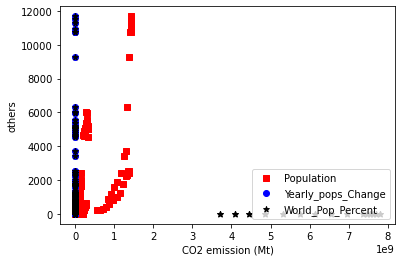

In [919]:
plt.scatter(x=df['Population'],y=df['CO2 emission_Mt'],c='r',marker='s',label='Population')
plt.scatter(x=df['Yearly_pops_Change_%'],y=df['CO2 emission_Mt'],c='b',marker='o',label='Yearly_pops_Change')
plt.scatter(x=df['World_Pop_Percent_%'],y=df['CO2 emission_Mt'],c='k',marker='*',label='World_Pop_Percent')

plt.legend(numpoints=1,loc=4)
plt.xlabel('CO2 emission (Mt)')
plt.ylabel('others')
plt.show()

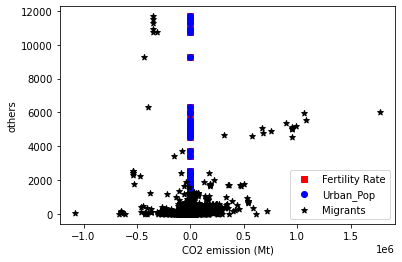

In [920]:
plt.scatter(x=df['Fertility Rate'],y=df['CO2 emission_Mt'],c='r',marker='s',label='Fertility Rate')
plt.scatter(x=df['Urban_Pop_%'],y=df['CO2 emission_Mt'],c='b',marker='o',label='Urban_Pop')
plt.scatter(x=df['Migrants'],y=df['CO2 emission_Mt'],c='k',marker='*',label='Migrants')

plt.legend(numpoints=1,loc=4)
plt.xlabel('CO2 emission (Mt)')
plt.ylabel('others')
plt.show()


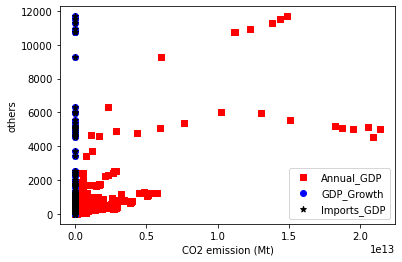

In [921]:
plt.scatter(x=df['Annual_GDP_$'],y=df['CO2 emission_Mt'],c='r',marker='s',label='Annual_GDP')
plt.scatter(x=df['GDP_Growth_%'],y=df['CO2 emission_Mt'],c='b',marker='o',label='GDP_Growth')
plt.scatter(x=df['Imports_GDP_$'],y=df['CO2 emission_Mt'],c='k',marker='*',label='Imports_GDP')

plt.legend(numpoints=1,loc=4)
plt.xlabel('CO2 emission (Mt)')
plt.ylabel('others')
plt.show()

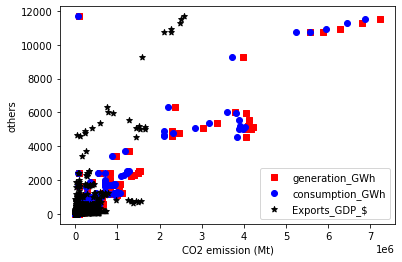

In [922]:
plt.scatter(x=df['generation_GWh'],y=df['CO2 emission_Mt'],c='r',marker='s',label='generation_GWh')
plt.scatter(x=df['consumption_GWh'],y=df['CO2 emission_Mt'],c='b',marker='o',label='consumption_GWh')
plt.scatter(x=df['Exports_GDP_$'],y=df['CO2 emission_Mt'],c='k',marker='*',label='Exports_GDP_$')

plt.legend(numpoints=1,loc=4)
plt.xlabel('CO2 emission (Mt)')
plt.ylabel('others')
plt.show()

# Now i will create a graph that will show me the "spearman" correlation between the labels
# spearman correlation is a non-parametric test that is used to measure the degree of association between two variables.


<ipython-input-867-ccfd3dbe40a7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(corr, dtype=np.bool))


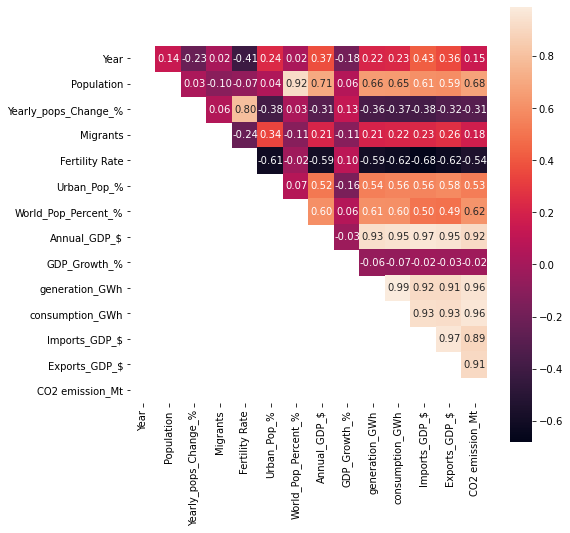

In [867]:
fig = plt.figure(figsize=(8, 8))
corr = df.corr(method='spearman')
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(corr, annot=True, fmt=".2f", mask = mask, square = True)

# Now i can start with the machine learning
# I will split the data into train and test

In [935]:
total_years = df.Year.unique()
total_years.sort()
total_years

array(['1970-01-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1980-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [869]:
idx_train = total_years[:10]
idx_test = total_years[10:]

In [870]:
idx_train

array([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
      dtype=int64)

In [871]:
idx_test

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

In [872]:
df_train = df[df.Year.isin(idx_train)]
df_test = df[df.Year.isin(idx_test)]

In [873]:
df_train

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
5,2015,United States,320878310.0,0.76,992343.0,1.88,81.4,4.35,1.820600e+13,2.7,4091740.0,3914299.0,2315301.2,1502572.2,5179.691
6,2010,United States,309011475.0,0.93,1085751.0,2.06,80.7,4.44,1.504900e+13,2.7,4127471.0,3889162.0,1969183.9,1278495.0,5571.872
7,2005,United States,294993511.0,0.93,1066979.0,2.04,80.0,4.51,1.303920e+13,3.5,4055766.0,3811328.0,1732706.0,901082.0,5950.701
8,2000,United States,281710909.0,1.22,1771991.0,2.00,79.1,4.59,1.025100e+13,4.1,3802216.0,3592467.0,1259300.0,781918.0,6004.317
9,1995,United States,265163745.0,1.01,892751.0,2.03,77.4,4.62,7.639700e+12,2.7,3353545.0,3164021.0,770852.0,584743.0,5360.879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,1990,Zimbabwe,10432421.0,3.28,16871.0,5.37,28.3,0.20,1.014400e+10,7.0,9254.0,9948.0,1847.0,1726.0,17.212
3473,1985,Zimbabwe,8877489.0,3.68,19814.0,6.30,24.8,0.18,5.637000e+09,6.9,4992.0,7145.0,1031.0,1112.0,10.697
3474,1980,Zimbabwe,7408624.0,3.32,-30457.0,7.30,21.6,0.17,6.679000e+09,10.6,4465.0,6902.0,1448.0,1414.0,9.661
3475,1975,Zimbabwe,6293875.0,3.54,-9109.0,7.40,19.3,0.15,4.371000e+09,0.9,NaN,NaN,931.7,931.9,8.944


# Lets check if i have any missing vals in my training set, cause if i do i will have to fix it

In [878]:
df_train.groupby('Country').count()


,Year,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
Country,,,,,,,,,,,,,,
Afghanistan,10,10,10,10,10,10,10,10,9,8,8,10,10,10
Albania,10,10,10,10,10,10,10,10,9,8,8,6,6,10
Algeria,10,10,10,10,10,10,10,10,9,8,8,10,10,10
Angola,10,10,10,10,10,10,10,10,9,8,8,10,10,10
Antigua and Barbuda,10,10,10,10,10,10,10,10,9,8,8,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,10,10,10,10,10,10,10,10,9,8,8,10,10,10
Vietnam,10,10,10,10,10,10,10,10,9,8,8,10,10,10
Yemen,10,10,10,10,10,10,10,6,6,8,8,10,10,10


In [879]:
df_temp = df.groupby('Country').count()

In [880]:
df_temp[df_temp.Migrants == 0]

,Year,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
Country,,,,,,,,,,,,,,
Palau,15,15,15,0,0,14,15,15,14,0,0,10,10,15
Saint Kitts & Nevis,15,15,15,0,0,15,15,15,14,12,12,15,15,15


# But before i'm changing anything i need to save my global average in case i will decide to use it 

In [881]:
avg_columns = df_train.mean()

In [882]:
avg_columns

Year                    1.992500e+03
Population              3.107207e+07
Yearly_pops_Change_%    1.810945e+00
Migrants               -1.291464e+02
Fertility Rate          3.993508e+00
Urban_Pop_%             1.978135e+02
World_Pop_Percent_%     6.099703e+07
Annual_GDP_$            1.810625e+11
GDP_Growth_%            3.734872e+00
generation_GWh          8.172711e+04
consumption_GWh         7.451067e+04
Imports_GDP_$           3.784780e+04
Exports_GDP_$           3.726501e+04
CO2 emission_Mt         1.316298e+02
dtype: float64

In [883]:
df_test.isna().sum()

Year                      0
Country                   0
Population                0
Yearly_pops_Change_%      0
Migrants                 10
Fertility Rate           10
Urban_Pop_%              17
World_Pop_Percent_%       0
Annual_GDP_$              0
GDP_Growth_%              0
generation_GWh          156
consumption_GWh         156
Imports_GDP_$             4
Exports_GDP_$             5
CO2 emission_Mt           0
dtype: int64

# Saving the new df 

In [884]:
df.to_csv(f"F:/new fold/DF2.csv", index=None, header=True)

In [885]:
df = pd.read_csv(f"F:/new fold/DF2.csv") 


# I was asked to changed to format into time in oreder to use the method "time", I chose this method cause it sounded like the best option after all i'm working on database that following the path of years

In [886]:
df.Year = pd.to_datetime(df.Year, format='%Y')
df.set_index('Year', inplace=True)
for country in tqdm(df['Country'].unique()):
    df[df.Country == country] = df[df.Country == country].interpolate(method='time')

    
    

100%|██████████| 181/181 [00:01<00:00, 109.11it/s]


In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2715 entries, 2020-01-01 to 1970-01-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2715 non-null   object 
 1   Population            2715 non-null   float64
 2   Yearly_pops_Change_%  2715 non-null   float64
 3   Migrants              2685 non-null   float64
 4   Fertility Rate        2685 non-null   float64
 5   Urban_Pop_%           2689 non-null   float64
 6   World_Pop_Percent_%   2715 non-null   float64
 7   Annual_GDP_$          2715 non-null   float64
 8   GDP_Growth_%          2715 non-null   float64
 9   generation_GWh        2529 non-null   float64
 10  consumption_GWh       2529 non-null   float64
 11  Imports_GDP_$         2715 non-null   float64
 12  Exports_GDP_$         2700 non-null   float64
 13  CO2 emission_Mt       2715 non-null   float64
dtypes: float64(13), object(1)
memory usage: 318.2+ KB


In [888]:
df[df.Country == 'China']

,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
Year,,,,,,,,,,,,,,
2020-01-01,China,1.439324e+09,0.39,-348399.0,1.69,60.8,18.47,1.486674e+13,2.3,NaN,NaN,2055752.2,2591121.2,11680.416
2019-01-01,China,1.433784e+09,0.43,-348399.0,1.65,59.7,18.59,1.434060e+13,6.1,7224896.0,6875089.0,2078386.4,2499457.0,11503.857
2018-01-01,China,1.427648e+09,0.47,-348399.0,1.65,58.6,18.71,1.384181e+13,6.7,6801933.0,6452119.0,2135748.0,2486695.0,11260.010
2017-01-01,China,1.421022e+09,0.49,-348399.0,1.65,57.5,18.83,1.226533e+13,6.9,6286207.0,5953577.0,1843792.0,2263346.0,10921.794
2016-01-01,China,1.414049e+09,0.51,-348399.0,1.65,56.3,18.94,1.122690e+13,6.8,5884177.0,5565162.0,1587925.0,2097632.0,10731.519
2015-01-01,China,1.406848e+09,0.55,-310442.0,1.64,55.1,19.06,1.111351e+13,7.0,5561814.0,5250584.0,1679566.0,2273468.0,10722.407
2010-01-01,China,1.368811e+09,0.57,-435677.0,1.62,48.9,19.68,6.033830e+12,10.6,3984020.0,3713682.0,1396247.0,1577754.0,9296.485
2005-01-01,China,1.330776e+09,0.62,-393116.0,1.61,42.2,20.34,2.290020e+12,11.4,2373002.0,2196172.0,659953.0,761953.0,6338.561
2000-01-01,China,1.290551e+09,0.79,-76600.0,1.62,35.7,21.01,1.205530e+12,8.5,1280613.0,1178033.0,225094.0,249203.0,3705.673


# After i filled most of the nans with interpolate time i still have some nones to take care of, i decided to use my world average to  fill them but first of all i will have to return the index back to normal

In [889]:
df.reset_index('Year', inplace=True)

In [890]:
avg_columns.items

<bound method Series.items of Year                    1.992500e+03
Population              3.107207e+07
Yearly_pops_Change_%    1.810945e+00
Migrants               -1.291464e+02
Fertility Rate          3.993508e+00
Urban_Pop_%             1.978135e+02
World_Pop_Percent_%     6.099703e+07
Annual_GDP_$            1.810625e+11
GDP_Growth_%            3.734872e+00
generation_GWh          8.172711e+04
consumption_GWh         7.451067e+04
Imports_GDP_$           3.784780e+04
Exports_GDP_$           3.726501e+04
CO2 emission_Mt         1.316298e+02
dtype: float64>

In [891]:

for k, v in avg_columns.items():
    df[k] = df[k].fillna(value=v)


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  2715 non-null   datetime64[ns]
 1   Country               2715 non-null   object        
 2   Population            2715 non-null   float64       
 3   Yearly_pops_Change_%  2715 non-null   float64       
 4   Migrants              2715 non-null   float64       
 5   Fertility Rate        2715 non-null   float64       
 6   Urban_Pop_%           2715 non-null   float64       
 7   World_Pop_Percent_%   2715 non-null   float64       
 8   Annual_GDP_$          2715 non-null   float64       
 9   GDP_Growth_%          2715 non-null   float64       
 10  generation_GWh        2715 non-null   float64       
 11  consumption_GWh       2715 non-null   float64       
 12  Imports_GDP_$         2715 non-null   float64       
 13  Exports_GDP_$     

In [893]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 5 to 3476
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1810 non-null   int64  
 1   Country               1810 non-null   object 
 2   Population            1810 non-null   float64
 3   Yearly_pops_Change_%  1810 non-null   float64
 4   Migrants              1790 non-null   float64
 5   Fertility Rate        1790 non-null   float64
 6   Urban_Pop_%           1796 non-null   float64
 7   World_Pop_Percent_%   1810 non-null   float64
 8   Annual_GDP_$          1713 non-null   float64
 9   GDP_Growth_%          1560 non-null   float64
 10  generation_GWh        1348 non-null   float64
 11  consumption_GWh       1351 non-null   float64
 12  Imports_GDP_$         1653 non-null   float64
 13  Exports_GDP_$         1653 non-null   float64
 14  CO2 emission_Mt       1810 non-null   float64
dtypes: float64(13), int64

In [894]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 3466
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  905 non-null    int64  
 1   Country               905 non-null    object 
 2   Population            905 non-null    float64
 3   Yearly_pops_Change_%  905 non-null    float64
 4   Migrants              895 non-null    float64
 5   Fertility Rate        895 non-null    float64
 6   Urban_Pop_%           888 non-null    float64
 7   World_Pop_Percent_%   905 non-null    float64
 8   Annual_GDP_$          905 non-null    float64
 9   GDP_Growth_%          905 non-null    float64
 10  generation_GWh        749 non-null    float64
 11  consumption_GWh       749 non-null    float64
 12  Imports_GDP_$         901 non-null    float64
 13  Exports_GDP_$         900 non-null    float64
 14  CO2 emission_Mt       905 non-null    float64
dtypes: float64(13), int64(

In [895]:
total_years = df.Year.unique()
total_years.sort()
total_years

array(['1970-01-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1980-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [896]:
idx_train = total_years[:10]
idx_test = total_years[10:]
df_train = df[df.Year.isin(idx_train)]
df_test = df[df.Year.isin(idx_test)]

# Testing that i don't have any nones 

In [897]:
for x in [df_train, df_valds, df_test]:
    assert x.isna().sum().sum() == 0

In [898]:
df.head()

,Year,Country,Population,Yearly_pops_Change_%,Migrants,Fertility Rate,Urban_Pop_%,World_Pop_Percent_%,Annual_GDP_$,GDP_Growth_%,generation_GWh,consumption_GWh,Imports_GDP_$,Exports_GDP_$,CO2 emission_Mt
0,2020-01-01,United States,331002651.0,0.59,954806.0,1.78,82.8,4.25,2.089370e+13,-3.4,4050825.0,3843833.0,2407545.1,1431638.4,4535.301
1,2019-01-01,United States,329064917.0,0.60,954806.0,1.85,82.5,4.27,2.137260e+13,2.3,4162813.0,3989566.0,2567444.6,1643160.9,5036.047
2,2018-01-01,United States,327096265.0,0.62,954806.0,1.85,82.2,4.29,2.052720e+13,2.9,4207817.0,4032838.0,2614221.4,1663982.3,5159.307
3,2017-01-01,United States,325084756.0,0.64,954806.0,1.85,81.9,4.31,1.947960e+13,2.3,4058261.0,3888461.0,2408475.7,1546273.0,5005.532
4,2016-01-01,United States,323015995.0,0.67,954806.0,1.85,81.7,4.33,1.869510e+13,1.7,4095487.0,3921118.0,2250153.9,1451010.7,5076.983


In [937]:
X_train = df_train.iloc[:, 2:-1]
X_test = df_test.iloc[:, 2:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]

In [944]:
print ("X_train =", X_train.shape)
print ("X_test =", X_test.shape)
print ("y_train =", y_train.shape)
print ("y_test =", y_test.shape)


X_train = (1810, 12)
X_test = (905, 12)
y_train = (1810,)
y_test = (905,)


In [901]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

In [915]:
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=44, max_features='log2')
forest.fit(X_train, y_train.values.reshape(-1))



RandomForestRegressor(max_features='log2', n_jobs=-1, random_state=44)

In [916]:
np.isnan((forest.predict(X_train))).sum()

0

In [917]:
forest.score(X_train,y_train)

0.9914619827000103

In [918]:
forest.score(X_test,y_test)

0.8733255989906678

In [961]:
jupyter nbconvert --to ("F:/new fold") notebook.ipynb

SyntaxError: invalid syntax (<ipython-input-961-f529e5005968>, line 1)

ERROR: unknown command "sudo"

